In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('preprocessed_tweetVaccine.csv', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
print(corpus[1:10]) #ilk 10 cumlenin yer almasi

[['0,australia', 'manufacture', 'covid19', 'vaccine', 'and', 'give', 'the', 'citizens', 'for', 'free', 'cost', 'afp', 'quotes', 'prime', 'minister', 'covidvaccine,0.4,0.4,Positive'], ['1,coronavirusvaccine', 'coronavaccine', 'covidvaccine', 'australia', 'doing', 'very', 'good', 'httpstcokbt7l6pary,0.9099999999999999,0.9099999999999999,Positive'], ['2,deaths', 'due', 'covid19', 'affected', 'countries', 'read', 'more', 'httpstcov8y3stu0uw', 'rpiryani', 'shitalbhandary…', 'httpstco6jpmxx2kti,0.1875,0.1875,Positive'], ['3,teamsubhashree', 'subhashreesotwe', 'iamrajchoco', 'stay', 'safe', 'subhashreesotwe', 'amp', 'iamrajchoco', 'httpstcoayhoaqm0ls,0.5,0.5,Positive'], ['4,michellegrattan', 'conversationedu', 'this', 'what', 'passes', 'for', 'leadership', 'our', 'country', 'voucher', 'for', 'something', 'that', 'httpstcoouub1peyij,0.0,0.0,Neutral'], ['5,the', 'multisystem', 'inflammatory', 'syndromechildren', 'misc', 'covid19', 'atypical', 'kawasaki', 'disease', 'covid19india', 'the…', 'http

In [4]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1) #skip-gram algoritması 

In [5]:
model.wv['vaccine']

array([-0.47482258,  0.08737701,  0.17786033,  0.29953086, -0.3845503 ,
        0.3409365 , -0.03069172, -0.22794059, -0.40317094, -0.12424254,
       -0.05455149,  0.18067633,  0.1941096 ,  0.13816305, -0.19776066,
       -0.5196879 , -0.16907106,  0.07082212, -0.07717429, -0.09066432,
       -0.01130381,  0.05615587, -0.509204  , -0.11415835, -0.0340662 ,
        0.02040755,  0.16272621, -0.2912831 , -0.00948863, -0.20731403,
        0.13919921, -0.3439636 , -0.0603489 , -0.28999856, -0.18002053,
       -0.3185814 , -0.1630035 , -0.16584614, -0.254834  ,  0.10906099,
       -0.2879937 , -0.02089917,  0.09810813,  0.25488493, -0.11800666,
        0.38434765,  0.25871632, -0.04231483,  0.80662686,  0.36647615,
       -0.24369271, -0.21506456,  0.0683043 , -0.13834898, -0.2139016 ,
       -0.17692111, -0.2526085 ,  0.2958281 ,  0.34393838, -0.13136967,
        0.30993113,  0.0177253 , -0.18266895,  0.26293465, -0.18239951,
       -0.02674599, -0.16653673, -0.5248033 ,  0.22320503, -0.03

In [14]:
model.wv.most_similar('moderna')

[('modernatx', 0.906326174736023),
 ('biontech', 0.8938841819763184),
 ('biontechgroup', 0.8863573670387268),
 ('pfizer', 0.8809235095977783),
 ('efficacy', 0.8672481775283813),
 ('german', 0.8561813831329346),
 ('pfizervaccine', 0.8472538590431213),
 ('effectiveness', 0.8468074798583984),
 ('mrna', 0.8362420797348022),
 ('modernavaccine', 0.8348397016525269)]

In [15]:
model.save('word2vec.model')

In [16]:
model = Word2Vec.load('word2vec.model')

In [17]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

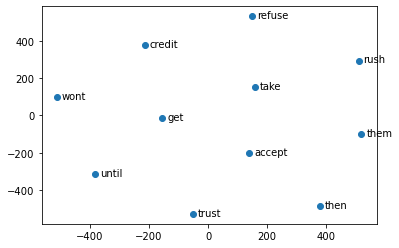

In [18]:
closestwords_tsneplot(model, 'take')

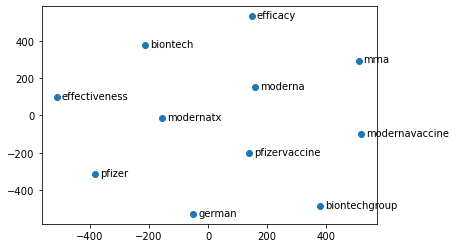

In [19]:
closestwords_tsneplot(model, 'moderna')